# IE vs Murders Rate

**Disclaimer: пример выдуман, данных нет. Ноутбук приведен для наглядности.**

# Вариант 1
Пусть число убийств и процент пользователей Internet Explorer линейно зависят от года:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
_ = plt.xkcd()

In [2]:
rs = np.random.RandomState(0)
years = np.arange(2006, 2012)
ie_users = -0.075 *  years + 151.25 + rs.uniform(size=years.shape[0])*0.1
ie_users


array([0.85488135, 0.79651894, 0.71027634, 0.62948832, 0.54236548,
       0.48958941])

In [3]:
rs = np.random.RandomState(0)
murder_num = -0.075 *  years + 151. + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.60488135, 0.54651894, 0.46027634, 0.37948832, 0.29236548,
       0.23958941])

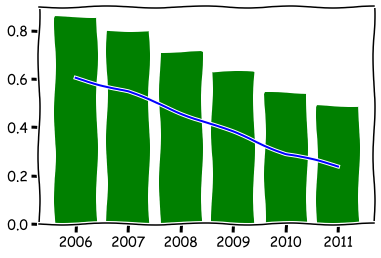

In [4]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [5]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

0.9999999999999999

In [6]:
r13 = st.pearsonr(ie_users, years)[0]
r13

-0.9977033457324237

In [7]:
r23 = st.pearsonr(murder_num, years)[0]
r23

-0.9977033457324237

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [9]:
r12_3 = (r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))### Ваш код 1,2|3
r12_3

0.9999999999999758

# Вариант 2
Оба показателя линейно зависят от числа компьютеров в мире.
Число компьютеров зависит от года.

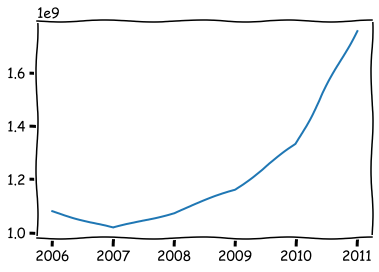

In [10]:
rs = np.random.RandomState(0)
comp_num = 10**9+np.exp(years-2006)*0.5*10**7 + rs.randint(low=0, high=10**8, size=years.shape[0])

plt.plot(years, comp_num)
plt.show()

In [11]:
rs = np.random.RandomState(0)
ie_users =   -0.6/10**9 *  comp_num+1.4 + rs.uniform(size=years.shape[0])*0.1
ie_users 


array([0.80662055, 0.86203503, 0.81488189, 0.75764987, 0.6434386 ,
       0.41032603])

In [12]:
rs = np.random.RandomState(0)
murder_num =  -0.6/10**9 *  comp_num+1.15 + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.55662055, 0.61203503, 0.56488189, 0.50764987, 0.3934386 ,
       0.16032603])

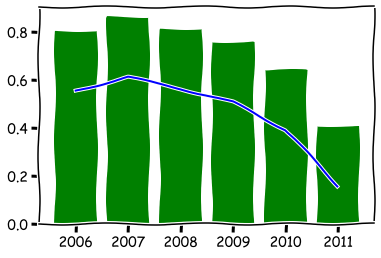

In [13]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [14]:
st.pearsonr(years, ie_users)[0]

-0.8614872460950619

In [15]:
st.pearsonr(comp_num, ie_users)[0]

-0.9982211910256552

In [16]:
st.spearmanr(years, ie_users)[0]

-0.8285714285714287

In [17]:
st.spearmanr(comp_num, ie_users)[0]

-1.0

In [18]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

0.9999999999999998

In [19]:
r13 = st.pearsonr(murder_num, comp_num)[0]
r13

-0.9982211910256552

In [20]:
r23 = st.pearsonr(ie_users, comp_num)[0]
r23

-0.9982211910256552

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [21]:
### Ваш код 1,2|3
r12_3 = (r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))
r12_3

0.9999999999999375

# Вариант 3
Пусть процент убийств снижается с процентом взрослого населения в стране.
Доля IE возрастает.


In [22]:
rs = np.random.RandomState(0)
adult = np.array([32,35,  38, 38, 39, 39])
murder_num = -0.6/10**9 *  comp_num + 0.3 + rs.uniform(size=years.shape[0])*0.1 + adult/40
murder_num

array([0.50662055, 0.63703503, 0.66488189, 0.60764987, 0.5184386 ,
       0.28532603])

In [23]:
rs = np.random.RandomState(0)
ie_users =  -0.6/10**9 *  comp_num+2.2 + rs.uniform(size=years.shape[0])*0.1 - adult/40
ie_users 


array([0.80662055, 0.78703503, 0.66488189, 0.60764987, 0.4684386 ,
       0.23532603])

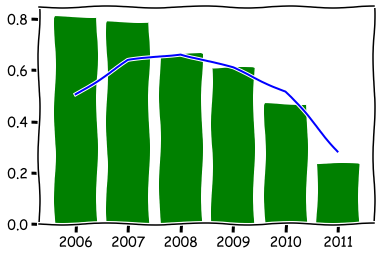

In [24]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [25]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

0.7738271741358052

In [26]:
r13 = st.pearsonr(murder_num, comp_num)[0]
r13

-0.9160899426438869

In [27]:
r23 = st.pearsonr(ie_users, comp_num)[0]
r23

-0.9601569943820956

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [28]:
r12_3 = (r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))
r12_3### Ваш код 1,2|3

-0.9438376514862317

In [29]:
r14 = st.pearsonr(murder_num, adult)[0]
r14

-0.2022666855201769

In [31]:
r24 = st.pearsonr(ie_users, adult)[0]
r24

-0.7768242481877353

In [33]:
r12_4 = (r12-r14*r24)/np.sqrt((1-r14**2)*(1-r24**2))### Ваш код 1,2|4
r12_4

0.9999999999999997

## Условная корреляция через матрицу
$$r_{i,j}|other= \frac{r_{i,j}}{r_{ii}, r_{jj}}$$

### Pearson

In [39]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.pearsonr(datasets[i], datasets[j])[0] ### Ваш код тут
matrix

array([[ 1.        ,  0.77382717, -0.96015699, -0.77682425],
       [ 0.77382717,  1.        , -0.91608994, -0.20226669],
       [-0.96015699, -0.91608994,  1.        ,  0.57378435],
       [-0.77682425, -0.20226669,  0.57378435,  1.        ]])

In [40]:
R = np.linalg.inv(matrix)
R

array([[-7.12191762e+15,  4.57945098e+15, -1.53001178e+02,
        -4.60620793e+15],
       [ 4.57945098e+15, -2.94462424e+15,  3.42511872e+02,
         2.96182918e+15],
       [-3.02649951e+01,  2.63591508e+02,  2.92666908e+02,
        -1.38122494e+02],
       [-4.60620793e+15,  2.96182918e+15, -2.17503976e+02,
        -2.97913464e+15]])

In [42]:
-R[1,0]/np.sqrt(R[0,0] * R[1,1])### Ваш код тут 1,0|all

-1.0000000000000462

### Kendal

In [43]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.kendalltau(datasets[i], datasets[j])[0] ### Ваш код тут
matrix

array([[ 1.        ,  0.33333333, -0.73333333, -0.93094934],
       [ 0.33333333,  1.        , -0.6       , -0.21483446],
       [-0.73333333, -0.6       ,  1.        ,  0.64450339],
       [-0.93094934, -0.21483446,  0.64450339,  1.        ]])

In [44]:
R = np.linalg.inv(matrix)
R

array([[ 9.84375000e+00, -4.68750000e-01,  1.87500000e+00,
         7.85488502e+00],
       [-4.68750000e-01,  1.71875000e+00,  1.25000000e+00,
        -8.72765003e-01],
       [ 1.87500000e+00,  1.25000000e+00,  3.12500000e+00,
        -6.17616452e-16],
       [ 7.85488502e+00, -8.72765003e-01,  6.66431166e-16,
         8.12500000e+00]])

In [45]:
-R[1,0]/np.sqrt(R[0,0] * R[1,1])### Ваш код тут 1,0|all

0.11396057645963832